In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Exploratory Data Analysis (EDA)

In [0]:
from IPython.core import display as ICD
import pandas as pd
import glob, os
import seaborn as sns
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [0]:
# first we need to load the data file into a data frame 
print('[INFO] loading data...')
multisite_df = pd.read_csv('drive/My Drive/Projects/pilot_mouse_connectivity/cocaine_two_mice/Spectrogram_data/updated_data/multisite_averaged_data.csv')

[INFO] loading data...


In [0]:
# view data size (rows, columns)
print('[INFO]  data shape...')
multisite_df.shape

[INFO]  data shape...


(14400, 19)

In [0]:
print('[INFO] quick data info...')

multisite_df.info()

[INFO] quick data info...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14400 non-null  int64  
 1   PFC gamma        14400 non-null  float64
 2   VTA gamma        14400 non-null  float64
 3   BLA gamma        14400 non-null  float64
 4   NAc gamma        14400 non-null  float64
 5   PFC beta         14400 non-null  float64
 6   VTA beta         14400 non-null  float64
 7   BLA beta         14400 non-null  float64
 8   NAc beta         14400 non-null  float64
 9   PFC theta        14400 non-null  float64
 10  VTA theta        14400 non-null  float64
 11  BLA theta        14400 non-null  float64
 12  NAc theta        14400 non-null  float64
 13  reference wires  7200 non-null   float64
 14  mouse id         14400 non-null  int64  
 15  Time (s)         14400 non-null  int64  
 16  Speed (cm/s)     14399 non-null 

In [0]:
print('[INFO] editing data input...')

multisite_df.drop("Unnamed: 0", axis=1,inplace=True)
multisite_df.head()

[INFO] editing data input...


,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
0,-56.501194,-58.404691,-53.796707,-54.683450,-50.765295,-49.201600,-47.156084,-47.257051,-37.099407,-37.333310,-35.815629,-36.039001,31.250000,1,0,0.461047,post,1
1,-55.990462,-58.988152,-54.108313,-53.480236,-49.899241,-49.516848,-45.858436,-48.210181,-40.991329,-42.757552,-36.514741,-38.500080,-40.040267,1,1,0.482850,post,1
2,-56.533964,-56.703969,-53.713006,-53.388769,-47.988294,-47.911166,-45.839712,-44.819948,-36.329574,-36.786060,-34.261496,-38.705199,-46.110695,1,2,0.490247,post,1
3,-55.088293,-57.277582,-54.759970,-53.832872,-49.272411,-47.161322,-46.172072,-46.595272,-37.772853,-33.544189,-36.755222,-39.528779,-41.637959,1,3,0.485528,post,1
4,-56.064453,-56.391981,-54.370658,-54.151737,-48.075181,-44.963544,-47.350350,-44.067891,-41.780323,-37.090223,-37.366601,-36.990245,-39.613447,1,4,0.494177,post,1


In [0]:
multisite_df.describe()

,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),recording
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,7200.000000,14400.000000,14400.000000,14399.000000,14400.000000
mean,-54.811637,-56.846061,-55.961131,-55.798637,-48.159617,-49.001847,-47.883579,-48.442821,-38.243090,-38.322204,-38.461431,-38.774405,-56.379793,1.500000,899.500000,6.688596,1.500000
std,2.068423,2.352484,4.713378,3.505149,2.950827,2.893824,5.451147,3.621962,4.121070,3.733250,6.142054,4.473741,18.233053,0.500017,519.633205,7.822517,0.500017
min,-62.967683,-64.722694,-67.979530,-67.626881,-57.557590,-58.086337,-62.919179,-61.141950,-57.748825,-54.368922,-59.110206,-55.570155,-89.470184,1.000000,0.000000,0.000000,1.000000
25%,-56.387963,-58.299689,-58.432244,-57.016779,-50.345994,-51.035358,-51.110122,-49.866365,-40.839729,-40.866794,-42.222446,-41.092209,-82.724009,1.000000,449.750000,1.164009,1.000000
50%,-54.541846,-57.145421,-53.902102,-54.786533,-48.060410,-49.510781,-45.915615,-47.786480,-38.302393,-38.879714,-36.376327,-38.043777,-46.910281,1.500000,899.500000,3.520864,1.500000
75%,-53.394415,-55.446176,-52.687571,-53.380062,-46.273530,-47.395109,-44.063579,-46.073310,-35.584788,-36.101646,-34.150518,-35.940170,-43.731854,2.000000,1349.250000,9.663074,2.000000
max,-31.735852,-23.039573,-33.301535,-38.456308,-22.255495,-22.977058,-22.722149,-28.808064,-13.607474,-16.428050,-16.403773,-18.287559,31.250000,2.000000,1799.000000,46.229302,2.000000


In [0]:
print('[INFO] factorizing target variable: cocaine status ...')

# turn cocaine category labels into numerics, 0: post and 1: pre
multisite_df['cocaine status num'] = pd.factorize(multisite_df['cocaine status'])[0]


[INFO] factorizing target variable: cocaine status ...


In [0]:
print('[INFO] filling missing data with average ...')

multisite_df.fillna(multisite_df.mean(), inplace=True)

[INFO] filling missing data with average ...


In [0]:
print('[INFO] view dataframe now ...')

multisite_df.tail()

[INFO] view dataframe now ...


,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording,cocaine status num
14395,-57.945512,-60.610124,-54.832686,-54.930917,-53.453498,-54.694912,-48.215670,-54.100591,-45.402066,-43.293175,-41.552947,-44.923270,-56.379793,1,1795,1.145819,pre,2,1
14396,-57.283914,-61.857844,-53.046077,-56.369021,-53.506348,-52.885991,-44.472734,-46.909043,-36.616661,-43.950709,-33.409286,-38.811592,-56.379793,1,1796,0.167269,pre,2,1
14397,-57.621165,-62.037227,-54.470172,-56.285570,-50.645157,-48.306280,-46.802928,-46.783425,-46.357364,-41.330419,-36.800070,-37.888468,-56.379793,1,1797,0.155295,pre,2,1
14398,-59.532244,-61.890011,-54.634515,-54.805142,-51.794797,-54.021217,-47.390373,-51.180051,-48.041564,-42.124833,-35.664824,-40.147725,-56.379793,1,1798,0.004777,pre,2,1
14399,-58.429392,-62.086589,-54.455730,-56.122061,-47.567010,-49.108323,-46.107437,-52.037337,-41.694312,-42.653839,-33.130993,-40.041810,-56.379793,1,1799,0.000000,pre,2,1


In [0]:
print("[INFO] scaling the region columns...\n")

# set new df
scaled_df = multisite_df.loc[:,:]

# set scare obj
scaler = MinMaxScaler()
scaled_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 
           'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
           'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']] = scaler.fit_transform(scaled_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma',
                                                                                                       'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
                                                                                                       'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']])
       
ICD.display(scaled_df.head())

[INFO] scaling the region columns...



,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording,cocaine status num
0,0.207048,0.151572,0.408986,0.443715,0.192405,0.253060,0.392146,0.429423,0.467802,0.449004,0.545458,0.523868,1.000000,1,0,0.461047,post,1,0
1,0.223401,0.137575,0.400001,0.484963,0.216938,0.244080,0.424428,0.399945,0.379633,0.306039,0.529088,0.457856,0.409459,1,1,0.482850,post,1,0
2,0.205999,0.192373,0.411400,0.488098,0.271069,0.289814,0.424894,0.504796,0.485242,0.463428,0.581849,0.452355,0.359173,1,2,0.490247,post,1,0
3,0.252287,0.178612,0.381209,0.472874,0.234694,0.311172,0.416625,0.449890,0.452546,0.548873,0.523457,0.430264,0.396224,1,3,0.485528,post,1,0
4,0.221032,0.199858,0.392435,0.461943,0.268608,0.373770,0.387313,0.528055,0.361758,0.455411,0.509141,0.498353,0.412994,1,4,0.494177,post,1,0


#### PCA 

In [0]:
post_color_dict= {'PFC gamma': 'purple', 'VTA gamma':'violet', 'BLA gamma':'plum', 'NAc gamma':'mediumorchid',
             'PFC beta': 'dodgerblue', 'VTA beta':'lightskyblue', 'BLA beta':'turquoise', 
             'NAc beta':'deepskyblue', 'PFC theta': 'limegreen', 'VTA theta':'palegreen',
             'BLA theta': 'yellowgreen', 'NAc theta':'olive'}

pre_color_dict= {'PFC gamma': 'dimgray', 'VTA gamma':'gray', 'BLA gamma':'silver', 'NAc gamma':'lightgray',
             'PFC beta': 'red', 'VTA beta':'darkred', 'BLA beta':'indianred', 
             'NAc beta':'lightcoral', 'PFC theta': 'gold', 'VTA theta':'goldenrod',
             'BLA theta': 'orange', 'NAc theta':'yellow'}





[INFO] plotting timeseries plots



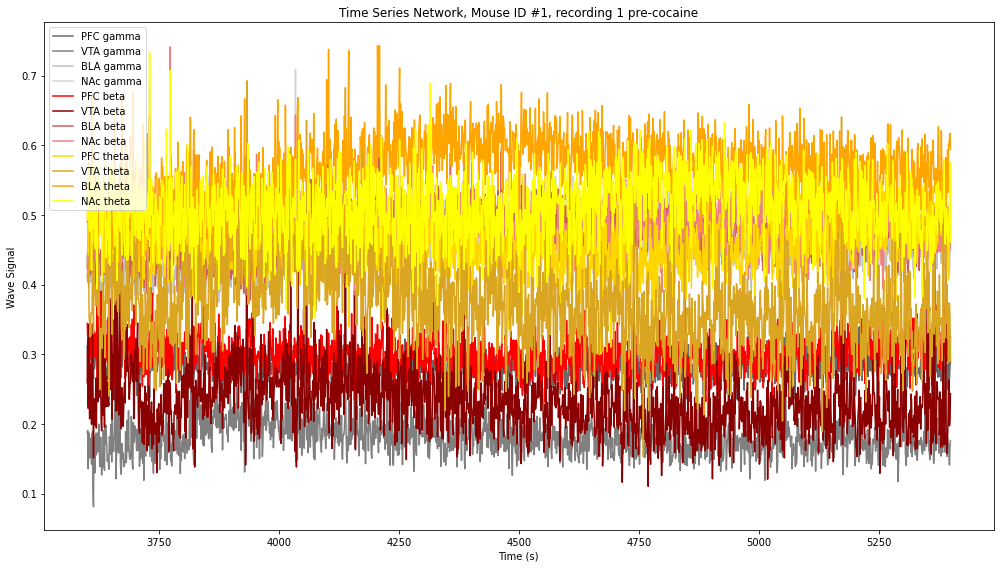

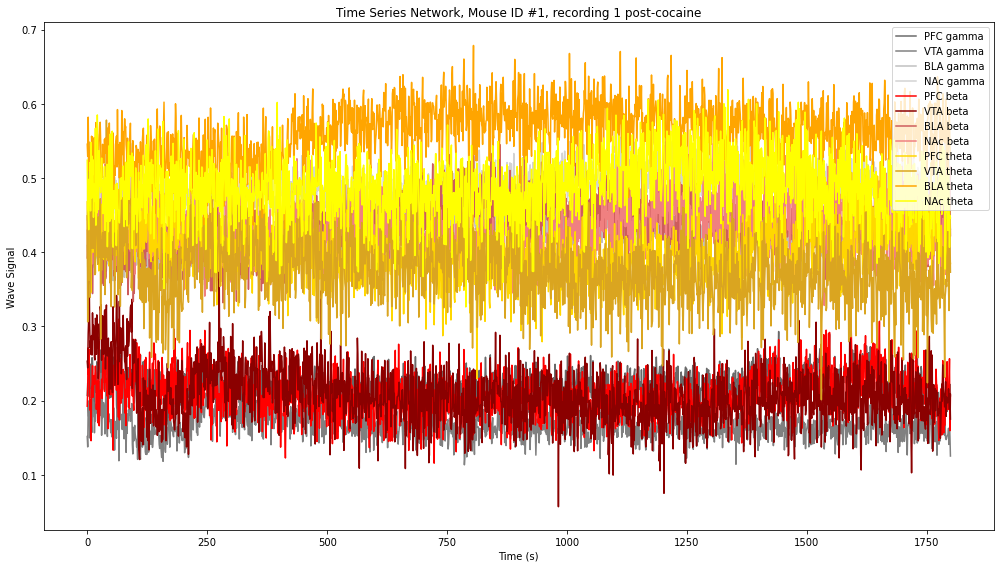

In [0]:
print('\n\n[INFO] plotting timeseries plots\n')
plt.figure(figsize=(14,8))


for wave in pre_color_dict:
       plt.plot(multisite_df.loc[3600:5399, wave], label=wave,color=pre_color_dict[wave])
 
plt.title('Time Series Network, Mouse ID #1, recording 1 pre-cocaine')
plt.xlabel('Time (s)')
plt.ylabel('Wave Signal')
plt.legend()
plt.tight_layout()


plt.figure(figsize=(14,8))

for wave in post_color_dict:
       plt.plot(multisite_df.loc[0:1799, wave], label=wave,color=pre_color_dict[wave])
 
plt.title('Time Series Network, Mouse ID #1, recording 1 post-cocaine')
plt.xlabel('Time (s)')
plt.ylabel('Wave Signal')
plt.legend()
plt.tight_layout()




[INFO] plotting only gamma...


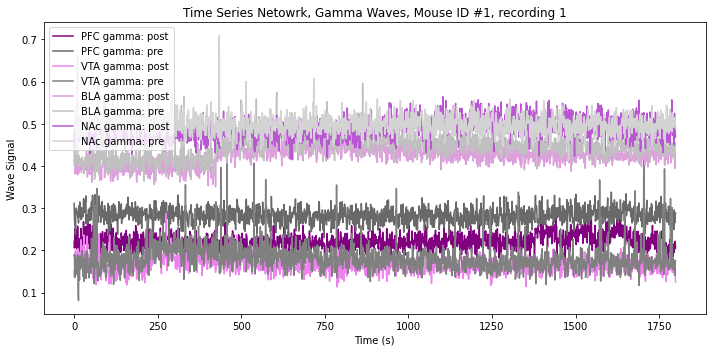

In [0]:
print('[INFO] plotting only gamma...')
plt.figure(figsize=(10,5))

for wave in post_color_dict:
  if "gamma" not in wave:
    pass
  else:
    plt.plot(multisite_df.loc[0:1799, wave], label=wave+": post",color=post_color_dict[wave])
    plt.plot(multisite_df.loc[3600:5399, 'Time (s)'], multisite_df.loc[3600:5399, wave], label=wave+": pre",color=pre_color_dict[wave])

plt.title('Time Series Netowrk, Gamma Waves, Mouse ID #1, recording 1')
plt.xlabel('Time (s)')
plt.ylabel('Wave Signal')
plt.legend()
plt.tight_layout()

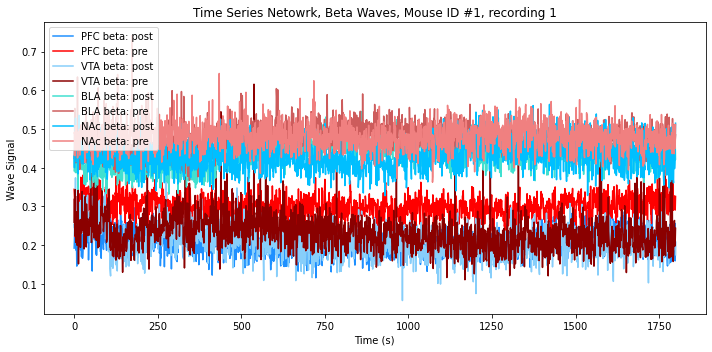

In [0]:
plt.figure(figsize=(10,5))

for wave in pre_color_dict:
  if "beta" not in wave:
    pass
  else:
    plt.plot(multisite_df.loc[0:1799, wave], label=wave+": post",color=post_color_dict[wave])
    plt.plot(multisite_df.loc[3600:5399, 'Time (s)'], multisite_df.loc[3600:5399, wave], label=wave+": pre",color=pre_color_dict[wave])

plt.title('Time Series Netowrk, Beta Waves, Mouse ID #1, recording 1')
plt.xlabel('Time (s)')
plt.ylabel('Wave Signal')
plt.legend()
plt.tight_layout()

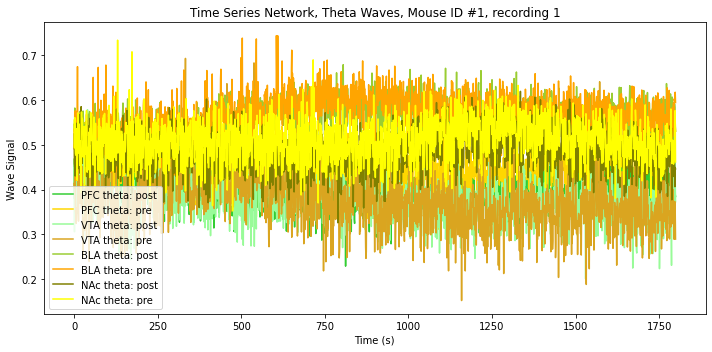

In [0]:
plt.figure(figsize=(10,5))

for wave in post_color_dict:
  if "theta" not in wave:
    pass
  else:
    plt.plot(multisite_df.loc[0:1799, wave], label=wave+": post",color=post_color_dict[wave])
    plt.plot(multisite_df.loc[3600:5399, 'Time (s)'], multisite_df.loc[3600:5399, wave], label=wave+": pre",color=pre_color_dict[wave])

plt.title('Time Series Network, Theta Waves, Mouse ID #1, recording 1')
plt.xlabel('Time (s)')
plt.ylabel('Wave Signal')
plt.legend()
plt.tight_layout()

### PCA

In [0]:
def fit_pca(n_components):
  print('[INFO] setting the PCA model and fitting with x...\n')

  from sklearn.decomposition import PCA
  pca = PCA(n_components=n_components)
  principalComponents = pca.fit_transform(x)

  print("PCA model: \n%s \n\nPrincipal Components: \n%s"%(pca,principalComponents))
  
  print("\nPCA variance: ", pca.explained_variance_ratio_)

  return pca, principalComponents;

In [0]:
print('[INFO] setting the x input variable...')
x = scaled_df.loc[:, ['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
       'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta']]

[INFO] setting the x input variable...


In [0]:
def make_principalComponent_df(principalComponents,n_components,multisite_df):

  print("\n[INFO] making a datafame with principal compenents...\n")

  pc_list=[]

  # set the df column names
  for i in range(1,n_components+1):
    col_name = "principal component %i"%i
    pc_list.append(col_name)

  principal_df = pd.DataFrame(data = principalComponents, columns =pc_list)
  ICD.display(principal_df.describe())

  print("\n[INFO] combining PC dataframe and the target...\n")
  principal_df = pd.concat([principal_df, multisite_df[['cocaine status']]], axis = 1)
  ICD.display(principal_df.describe())

  return principal_df;

In [0]:
def visualize_heatmap(n_components,cmap, pca):
  
  print('\n[INFO] visualizing heatmap...')

  y_labelsA = []
  y_labelsB = []

  title="%i-Component PCA"%n_components
  for i in range(1,n_components+1):

    label_name="PC %i"%i
    y_labelsA.append(i-1)
    y_labelsB.append(label_name)

  plt.matshow(pca.components_,cmap=cmap)
  plt.yticks(y_labelsA, y_labelsB, fontsize=10)
  plt.colorbar()
  #plt.title(title)
  plt.xticks(range(len(['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
        'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta'])),['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
        'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta'],rotation=65,ha='left')
  plt.tight_layout()
  plt.show()

[INFO] setting the PCA model and fitting with x...

PCA model: 
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 

Principal Components: 
[[ 0.11039182 -0.05906303]
 [ 0.12719582 -0.06431592]
 [ 0.14984475 -0.0455044 ]
 ...
 [ 0.11111446 -0.06660845]
 [ 0.12038668 -0.03685936]
 [ 0.12380694  0.07562177]]

PCA variance:  [0.41514774 0.23475438]

[INFO] making a datafame with principal compenents...



,principal component 1,principal component 2
count,1.440000e+04,1.440000e+04
mean,-5.383136e-17,2.772117e-16
std,2.399463e-01,1.804345e-01
min,-5.781281e-01,-6.338429e-01
25%,-2.243402e-01,-9.909111e-02
50%,1.098327e-01,-5.813392e-02
75%,1.860371e-01,5.578822e-04
max,9.670712e-01,7.503676e-01



[INFO] combining PC dataframe and the target...



,principal component 1,principal component 2
count,1.440000e+04,1.440000e+04
mean,-5.383136e-17,2.772117e-16
std,2.399463e-01,1.804345e-01
min,-5.781281e-01,-6.338429e-01
25%,-2.243402e-01,-9.909111e-02
50%,1.098327e-01,-5.813392e-02
75%,1.860371e-01,5.578822e-04
max,9.670712e-01,7.503676e-01



[INFO] visualizing heatmap...


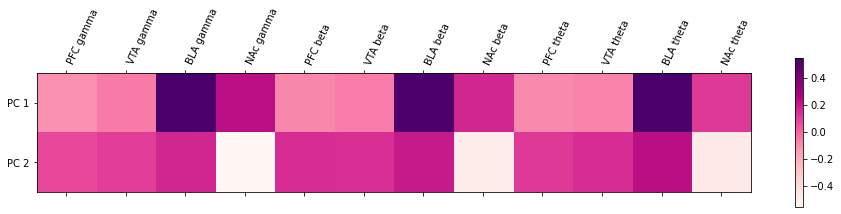

In [0]:
pca2, principalComponents2 = fit_pca(n_components=2)
pca2_df = make_principalComponent_df(principalComponents2, 2, multisite_df)
visualize_heatmap(2,'RdPu', pca2)

[INFO] visualizing principal components...


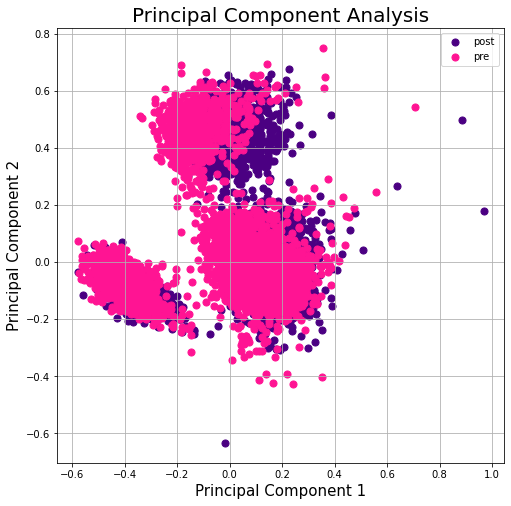

In [0]:
print('[INFO] visualizing principal components...')


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis', fontsize = 20)
targets = ['post', 'pre']
colors = ['indigo', 'deeppink']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_df['cocaine status'] == target
    ax.scatter(pca2_df.loc[indicesToKeep, 'principal component 1']
               , pca2_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


[INFO] setting the PCA model and fitting with x...

PCA model: 
PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 

Principal Components: 
[[ 0.11039182 -0.05906303  0.01788757 -0.08929888]
 [ 0.12719582 -0.06431592 -0.11241014  0.02256033]
 [ 0.14984475 -0.0455044   0.07825732  0.0075555 ]
 ...
 [ 0.11111446 -0.06660845 -0.16190964 -0.03679915]
 [ 0.12038668 -0.03685936 -0.3225607  -0.10355397]
 [ 0.12380694  0.07562177 -0.16043037 -0.03825978]]

PCA variance:  [0.41514774 0.23475438 0.1923754  0.04265356]

[INFO] making a datafame with principal compenents...



,principal component 1,principal component 2,principal component 3,principal component 4
count,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04
mean,-2.559681e-17,2.905267e-16,5.618577e-18,-4.597788e-17
std,2.399463e-01,1.804345e-01,1.633381e-01,7.691134e-02
min,-5.781281e-01,-6.338429e-01,-5.236496e-01,-3.450161e-01
25%,-2.243402e-01,-9.909111e-02,-1.075333e-01,-4.727147e-02
50%,1.098327e-01,-5.813392e-02,-2.133858e-02,-2.472790e-04
75%,1.860371e-01,5.578822e-04,7.893992e-02,5.066465e-02
max,9.670712e-01,7.503676e-01,1.379992e+00,5.663717e-01



[INFO] combining PC dataframe and the target...



,principal component 1,principal component 2,principal component 3,principal component 4
count,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04
mean,-2.559681e-17,2.905267e-16,5.618577e-18,-4.597788e-17
std,2.399463e-01,1.804345e-01,1.633381e-01,7.691134e-02
min,-5.781281e-01,-6.338429e-01,-5.236496e-01,-3.450161e-01
25%,-2.243402e-01,-9.909111e-02,-1.075333e-01,-4.727147e-02
50%,1.098327e-01,-5.813392e-02,-2.133858e-02,-2.472790e-04
75%,1.860371e-01,5.578822e-04,7.893992e-02,5.066465e-02
max,9.670712e-01,7.503676e-01,1.379992e+00,5.663717e-01



[INFO] visualizing heatmap...


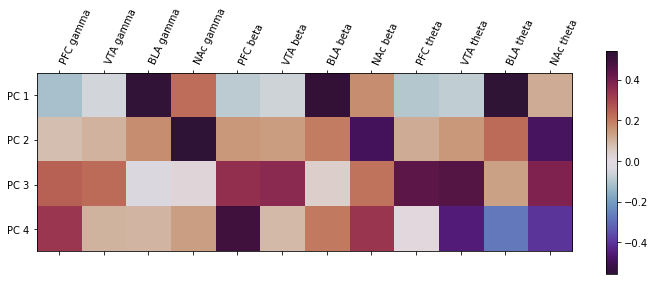

In [0]:
pca4, principalComponents4 = fit_pca(n_components=4)
pca4_df = make_principalComponent_df(principalComponents4, 4, multisite_df)
visualize_heatmap(4,'twilight_shifted',pca4)

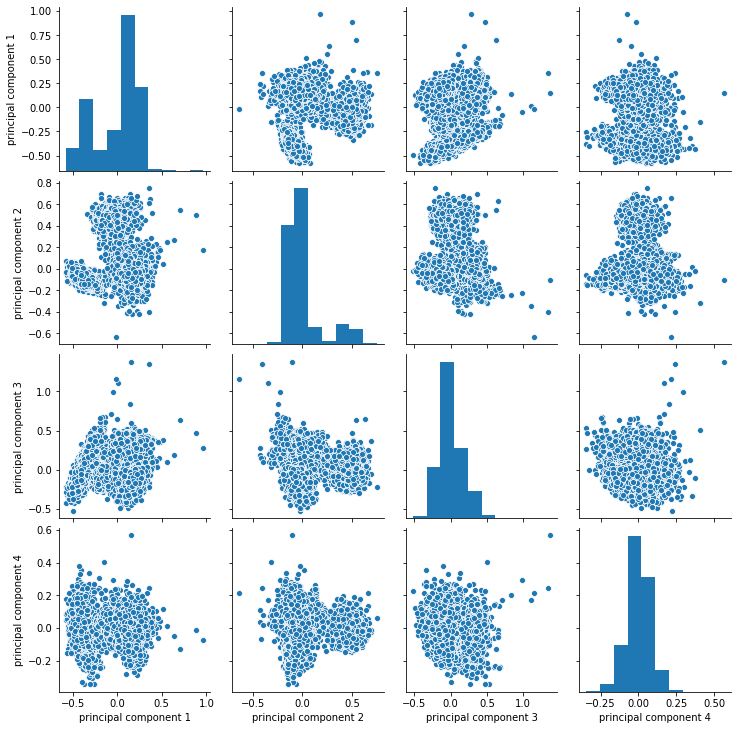

In [0]:
sns.pairplot(pca4_df)
